https://www.dataquest.io/mission/185/challenge-data-visualization/

## 1: Introduction To The Data

In this challenge, you'll practice creating data visualizations using data on Hollywood movies that were released betwen 2007 to 2011. The goal is to better understand the underlying economics of Hollywood and explore the outlier nature of success of movies. The dataset was compiled by [David McCandless](http://www.informationisbeautiful.net/) and you can read about how the data was compiled here. You'll use a version of this dataset that was compiled by [John Goodall](http://jgoodall.me/), which can be downloaded from his Github repo [here](https://github.com/jgoodall/cinevis/blob/master/data/csvs/moviedata.csv).

In [32]:
# %sh

# wget https://raw.githubusercontent.com/jgoodall/cinevis/master/data/csvs/moviedata.csv

# ls -l

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

hollywood_movies = pd.read_csv('moviedata.csv')
print hollywood_movies.head()

   Year  exclude                                         Film  Lead Studio  \
0  2011      NaN                                      Average          NaN   
1  2011      NaN                             The Tree Of Life  Independant   
2  2011      NaN                            Midnight in Paris         Sony   
3  2011      NaN  Harry Potter and the Deathly Hallows Part 2  Warner Bros   
4  2011      NaN                      Twilight: Breaking Dawn  Independant   

   Critic Rating  Audience Rating      Story    Genre  \
0          52.84            61.42        NaN      NaN   
1          84.00            61.00  Discovery    Drama   
2          93.00            84.00       Love  Romance   
3          96.00            92.00    Rivalry  Fantasy   
4          26.00            68.00       Love  Romance   

   Opening Weekend Theaters  Opening Weekend per Cinema  Domestic Gross  \
0                   2810.31                     8764.92           61.33   
1                      4.00           

In [34]:
print hollywood_movies['exclude'].value_counts()

Series([], Name: exclude, dtype: int64)


In [35]:
hollywood_movies = hollywood_movies.drop('exclude', axis=1)

## 2: Scatter Plots - Profitability And Audience Ratings

Let's generate 2 scatter plots to better understand the relationship between the profitability of a movie and how an audience rated it.

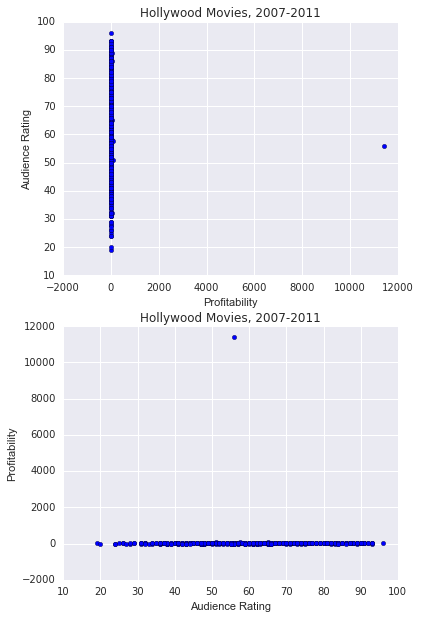

In [36]:
fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(hollywood_movies['Profitability'], hollywood_movies['Audience Rating'])
ax1.set(xlabel='Profitability', ylabel='Audience Rating', title='Hollywood Movies, 2007-2011')
ax2 = fig.add_subplot(2, 1, 2)
ax2.scatter(hollywood_movies['Audience Rating'], hollywood_movies['Profitability'])
ax2.set(xlabel='Audience Rating', ylabel='Profitability', title='Hollywood Movies, 2007-2011')

plt.show()

## 3: Scatter Matrix - Profitability And Critic Ratings

Both scatter plots in the previous step contained 1 outlier data point, which caused the scale of both plots to be incredibly lopsided to accomodate for this one outlier. The movie in question is [Paranormal Activity](https://en.wikipedia.org/wiki/Paranormal_Activity), and is widely known as the [most profitable movie ever](http://www.thewrap.com/paranormal-now-most-profitable-film-ever-9335/). The movie brought in *$193.4 million in revenue with a budget of only $15,000*. Let's filter out this movie so you can create useful visualizations with the rest of the data.

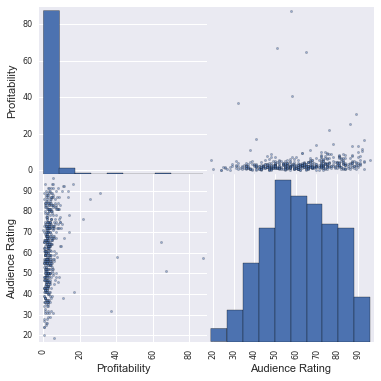

In [37]:
from pandas.tools.plotting import scatter_matrix

normal_movies = hollywood_movies[hollywood_movies['Film'] != 'Paranormal Activity']

scatter_matrix(normal_movies[['Profitability', 'Audience Rating']], figsize=(6,6))
plt.show()

## 4: Box Plot - Audience And Critic Ratings

Let's use box plots to better understand the distributions of ratings by critics versus ratings by the audience.

Use the Pandas Dataframe method plot to generate boxplots for the `Critic Rating` and `Audience Rating` columns.

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


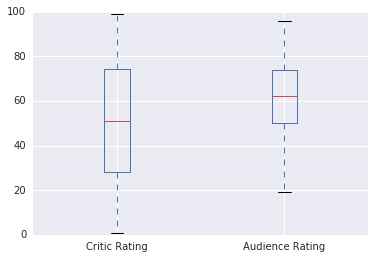

In [42]:
fig = plt.figure()
normal_movies.boxplot(['Critic Rating', 'Audience Rating'])
plt.show()

## 5: Box Plot - Critic Vs Audience Ratings Per Year

Now that you've visualized the total distribution of both the ratings columns, visualize how this distribution changed year to year.

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


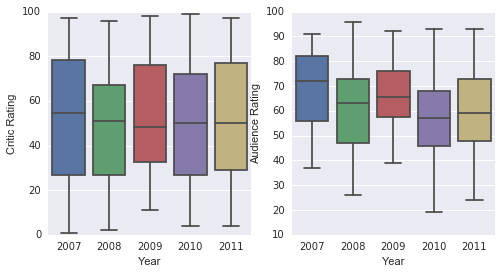

In [39]:
normal_movies = normal_movies.sort(columns='Year')
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(x=normal_movies['Year'], y=normal_movies['Critic Rating'], ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(x=normal_movies['Year'], y=normal_movies['Audience Rating'], ax=ax2)
plt.show()

## 6: Box Plots - Profitable Vs Unprofitable Movies

Many Hollywood movies aren't profitable and it's interesting to understand the role of ratings in a movie's profitability. You first need to separate the movies into those were that profitable and those that weren't.

We've created a new Boolean column called `Profitable` with the following specification:

`False` if the value for `Profitability` is less than or equal to `1.0`. <br/>
`True` if the value for `Profitability` is greater than or equal to `1.0`.

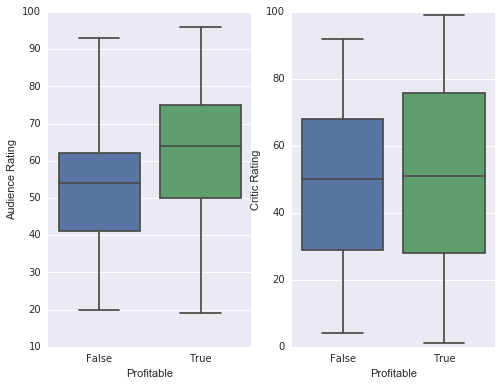

In [40]:
def is_profitable(row):
    if row["Profitability"] <= 1.0:
        return False
    return True
normal_movies["Profitable"] = normal_movies.apply(is_profitable, axis=1)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(x=normal_movies['Profitable'], y=normal_movies['Audience Rating'], ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(x=normal_movies['Profitable'], y=normal_movies['Critic Rating'], ax=ax2)
plt.show()